In [127]:
import pandas as pd

In [45]:
data = pd.read_csv('./ltv20160906_test.csv', delimiter='^')

In [46]:
data_80 = pd.read_csv('./ltv20160906_train.csv', delimiter='^')

In [47]:
data.columns

Index([u'advertiserId', u'isDradisEmployer', u'salesTouched', u'week',
       u'costmillicent', u'jobCountry', u'company', u'employeeCount',
       u'dateCreated', u'firstRevenueDate', u'lastRevenueDate', u'isAdAgency',
       u'industry', u'type', u'state', u'city', u'conversionTime',
       u'hasDradisJob', u'sid', u'kw', u'outgoingEmail', u'outgoingCall',
       u'advertiserAgeWeek', u'spendAgeWeek', u'spendAgeWeek_c',
       u'advertiserAgeWeek_c', u'conversionTime_c', u'sales_touch', u'source'],
      dtype='object')

In [50]:
df = pd.concat([data, data_80]) 

In [55]:
print data.shape, data_80.shape, df.shape

(619500, 29) (2450549, 29) (3070049, 29)


In [56]:
df['year'] = df['week'].apply(lambda y: int(y[0:4]))
df['week_n'] = df['week'].apply(lambda y: int(y[-2:]))

In [59]:
us = df[df.jobCountry=='US']

In [60]:
#x = data.groupby(['advertiserId']).sum()

In [64]:
us_clean = us[us.week!='2016-53']

In [75]:
us_clean = us_clean.reset_index(drop=True)

In [76]:
print us.shape, us_clean.shape

(2345667, 31) (2320148, 31)


In [68]:
w = sorted(us_clean.week.unique())
print w, len(w)

['2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2015-13', '2015-14', '2015-15', '2015-16', '2015-17', '2015-18', '2015-19', '2015-20', '2015-21', '2015-22', '2015-23', '2015-24', '2015-25', '2015-26', '2015-27', '2015-28', '2015-29', '2015-30', '2015-31', '2015-32', '2015-33', '2015-34', '2015-35', '2015-36', '2015-37', '2015-38', '2015-39', '2015-40', '2015-41', '2015-42', '2015-43', '2015-44', '2015-45', '2015-46', '2015-47', '2015-48', '2015-49', '2015-50', '2015-51', '2015-52', '2015-53', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2016-13', '2016-14', '2016-15', '2016-16', '2016-17', '2016-18', '2016-19', '2016-20', '2016-21', '2016-22', '2016-23', '2016-24', '2016-25', '2016-26', '2016-27', '2016-28', '2016-29', '2016-30', '2016-31'] 80


In [77]:
type(us_clean['week'][0])

str

In [118]:
complete_data = us_clean[us_clean['week'].isin(['2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10'])]
complete_data['cost'] = complete_data['costmillicent'].apply(lambda y: y/100000.)
complete_data = complete_data[complete_data['isDradisEmployer']==1]

/Users/aristotle/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [119]:
z = complete_data.groupby(['advertiserId'])['cost'].sum()

In [120]:
import seaborn as sns

In [121]:
%matplotlib inline

In [122]:
#sns.distplot(z.tolist())

In [123]:
final = sorted(z.tolist())

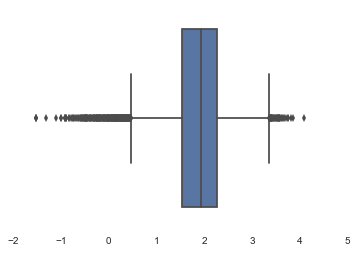

In [128]:
import numpy as np
sns.boxplot(np.log10(final))

In [129]:
np.median(final),np.mean(final)

(86.219999999999999, 166.32351682243859)

10785

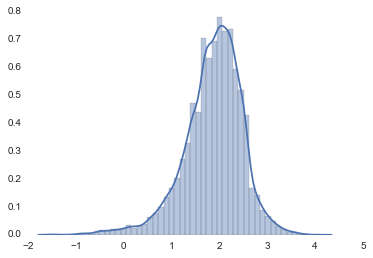

In [130]:
sns.distplot(np.log10(final))
len(final)